# Startup Investment Opportunities

A venture capital fund is looking for investment opportunities in startups and it needs to choose companies that have a higher chance of yielding large profits in order to be successful.

The fund requires a model that could accurately predict the startup profit given inputs such as its expenses and location. It has provided a dataset containing information of 50 startups to build the model. 


This is a Multiple Linear Regression problem, since we're dealing with several inputs which yield an output and the objective is to predict a numeric value. 

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing the dataset



In [ ]:
data_raw = pd.read_csv('50_Startups.csv')
data_raw.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


There is a total of 50 startups data, one for each row. The dataset is somewhat preprocessed, containing four features (3 numeric, 1 categoric) and no empty values. Our target is the 'Profit' column. 

We still have to standarize the numeric features, a step which yelds better results when creating a regression model, and also create dummy variables for the categorical data. After that, a train-test split will be created. 

The dataset will now be shuffled, since the original data was sorted by descrescent 'R&D Spend". If this process is skipped, our model would be suboptimal, since it can only be trained with data that exists in the training split and wouldn't learn the remaining part. The data needs to be as randomly distributed as possible. 
update note: this step is not necessary since later the shuffle is automaticaly done when cre

In [ ]:
data = data_raw.sample(frac = 1).reset_index(drop = True)

## Visualizing the data

It would be a good idea to first visualize how each numeric feature relates to profit, checking for a linear correlation.

Text(0.5, 1.0, 'Profit and Marketing Spend')

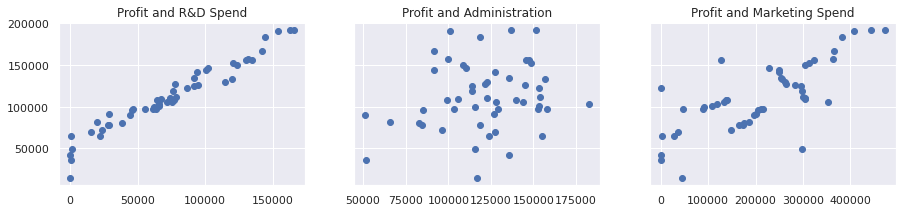

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data['R&D Spend'], data['Profit'])
ax1.set_title('Profit and R&D Spend')
ax2.scatter(data['Administration'], data['Profit'])
ax2.set_title('Profit and Administration')
ax3.scatter(data['Marketing Spend'], data['Profit'])
ax3.set_title('Profit and Marketing Spend')

## Standarizing the data

In [ ]:
inputs = data.iloc[:,0:-1]
targets = data.iloc[:,-1]

In [ ]:
# Since it's usually not a good idea to standarize categorical data since we lose interpretability, only numeric data goes through this step
# Also, it's not necessary to also scale the targets

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_apply = ['R&D Spend', 'Administration', 'Marketing Spend']  #state is the last column in the dataset
inputs[columns_to_apply] = scaler.fit_transform(inputs[columns_to_apply])

## Creating Dummy Variables (Encoding)

In [ ]:
# To avoid multicolinearity in the model, the first state is dropped, thus serving as a baseline
state_dummies = pd.get_dummies(inputs['State'], drop_first=True)

#Checking wich variable was dropped
print (state_dummies.columns.values)
print (inputs['State'].unique())

['Florida' 'New York']
['New York' 'Florida' 'California']


California is missing from state_dummmies, so it's the base line.

In [ ]:
# Dropping the original categorical 'State' column
inputs = inputs.drop(['State'], axis = 1)

# Adding the newly generated dummy variables for the states
inputs = pd.concat([inputs,state_dummies], axis = 1)

## Splitting the dataset into the Training set and Test set

This step was meant to be a change from the first iteration. Since the initial data exploration pointed that 'Administration' probally wasn't a great predictor, it was discarded here. Indeed, the test accuracy increased from 91.6% to 94.8% by doing so. 

In [ ]:
inputs = inputs.drop(['Administration'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, train_size = 0.8, random_state = 42)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train, y_train);

In [ ]:
y_pred = reg.predict(x_train)

(0.0, 200000.0)

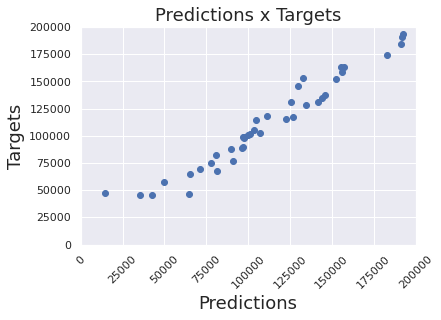

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Targets', fontsize = 18)
plt.title('Predictions x Targets', fontsize = 18)
plt.xticks(rotation=45)
plt.xlim(0,200000)
plt.ylim(0,200000)

In [ ]:
reg.score(x_train,y_train)

0.9494443464705765

## Checking the weights and bias

In [ ]:
inputs.columns.values

array(['R&D Spend', 'Marketing Spend', 'Florida', 'New York'],
      dtype=object)

In [ ]:
summary = pd.DataFrame(inputs.columns.values, columns=['Feature'])
summary['Weight'] = reg.coef_
summary

,Feature,Weight
0,R&D Spend,36835.955197
1,Marketing Spend,3683.666872
2,Florida,1854.451649
3,New York,-629.584507


## Predicting the Test set results

In [ ]:
y_pred_test = reg.predict(x_test)

(0.0, 200000.0)

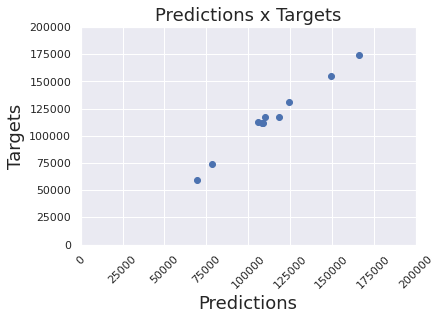

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Targets', fontsize = 18)
plt.title('Predictions x Targets', fontsize = 18)
plt.xticks(rotation=45)
plt.xlim(0,200000)
plt.ylim(0,200000)

In [ ]:
reg.score(x_test,y_test)

0.9478716087245738

# Takeaways

The final model yelded an accuracy of 94.8%. In business terms, the venture capital fund would be able to correctly predict the profit of 95 out of 100 startups, thus making choosing promissing opportunities possible and more safe. 

Analysing the weights, by far the most important predictor is R&D Spend, which has a clear linear relationship with profit. Of course, as the business invests more in developing itself, it can expect better results. As expected, marketing also has a positive impact in the profit. 

Interesting enough, startups located in New York return smaller profits when compared to the state baseline (California), as pointed by the negative weight. A possible explanation could perhaps be higher expenses related to the location. On the other hand, startups located in Florida yield better results.

Administration expenses were not a good predictor since it could be observed that it doesn not have any clear relationship with profit and adding this input to the model provided worse results. 

Despite the model achieving almost 95% of accuracy, there are many other features that could be also added the model in order to further improve it, such as other types of expenses and categories.